# ¿Qué es Spark?
Es un framework de desarrollo de procesos de Big Data. Preocupado por la velocidad del proceso.

## Spark vs Hadoop
* Spark se enfoca en procesamiento de datos desde RAM.
* Posee naturalmente módulo para ML, Straming y Grafos.
* No depende de un sistema de archivos.

## RDDs y DataFrames
La diferencia reside en la estructura que poseen.
Los RDD son el componente mínimo con el cual podemos comunicarnos con Spark. UN RDD es como el lenguaje emsamblador de Spark

### Características de los RDD
* Principal abstracción de datos: Es la unidad básica. 
* Dristribución: Los RDD se distribuyen y particionan a lo largo del clúster.
* Creación simple: AL no poseer estructura formalmente, adoptan la más intuitiva.
* Inmutable: Una vez creadas, no se pueden modificar.
* Ejecución perezosa: A manos se realice una acción, todo lo que e escrito de código, no corre.

### Transformación y acciones
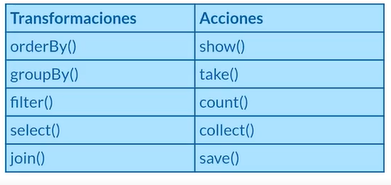
Todo lo que sea transformaciones las vamos a poder escribir sin problema. Una vez que realice una acción, vamos a darle vida a lo que estamos creando.

### DataFrame
Capa superior que existe sobre los RDDs, estos si poseen estructura de tipos de datos. Poseen una mejor implementación, lo cual los hace preferibles. A su vez, son más faciles de crear, lo podemos hacer desde un RDD, un archivo o una base de datos.

### ¿Cuandp usar un RDD?
* Cuadno te interesa controlar el flujo de Spark.
* Si eres usuario de Pythonm convertir a RDD un conjunto permite mejor control de los datos.
* Estas conectandote a versiones antiguas de Spark

### ¿Cuando usar DataFrames?
* Si poseemos semánticas de datos complicados
* Vamos a realizar tareas de alto nivel como filtros, mapeos, agregaciones, promedios o sumas.
* Su vamos a uasr sentencias SQL-like.

Todas las aplicaciones de Spark poseen un manejador central deel programa (Driver) y varios ejecutores que se crean a lo largo del clústerm estas son las computadoras que realizarán las tareas en paralelo y finalmente devolverán los valores al dirves, la aplicación central.

Una de las grandes ventajas de los RDD es la compulcación segura; pór su particularidad de ejecución perezosa, se calcula si se generará un error o no antes de ehecytarsem, lo cual permite identificar prioblemas antes de lanzas la aplicación. El pero que podemos encontrarcon los RDD es que no son correctamente tratados por el Garbage Collector y cuando las logircas de operaciones se hacen complejas, su uso puede resultar poro práctico aquí entra los DataFrames.

Los DataFrames implementan un sistema llamado Catalyst, el cual es un motor de optimización d eplaens de ejecución, parecido al que usan las bases de datos, pero diseñado para la cantidad de datos propia de Spark, aunado a eso, se tiene implementado un optimizador de memoria y consumo de CPU llamado Tungsten, el cual determina como se convertirán los planes lógicos creados por Catalyst a un plan físico. 

In [1]:
import org.apache.spark.{SparkConf, SparkContext}

val conf = new SparkConf().setAppName("transformaciones y acciones").setMaster("local")


Intitializing Scala interpreter ...

Spark Web UI available at http://c72a4b6273f0:4040
SparkContext available as 'sc' (version = 3.5.0, master = local[*], app id = local-1703097443691)
SparkSession available as 'spark'


import org.apache.spark.{SparkConf, SparkContext}
conf: org.apache.spark.SparkConf = org.apache.spark.SparkConf@1660e02b


In [2]:
// Create a new SparkContext
val sc = new SparkContext(conf)

org.apache.spark.SparkException:  Only one SparkContext should be running in this JVM (see SPARK-2243).The currently running SparkContext was created at:

# RDD funciones y explicaciones:
Para las explicaciones vamos a tener en cuenta que sc es el alias que va a tomar el contexto de SparkContext.

* sc.parallelize(); La función parallelize se utiliza para crear un Resilient Distributed Dataset (RDD) a partir de una colección de datos existente en la memoria del controlador. Esta función divide los datos en particiones paralelas que pueden ser procesadas en diferentes nodos de un clúster.Por ejemplo, si tienes una lista de números en tu programa y quieres distribuir esa lista a través de un clúster para realizar operaciones en paralelo, puedes usar la función parallelize para convertir esa lista en un RDD. Es importante tener en cuenta que los RDD son una abstracción fundamental en Spark que representan una colección inmutable y particionada de elementos que pueden ser procesados en paralelo.

* sc.collect(): Es una operación de acción que se utiliza para recuperar todos los elemetnos de un RDD al controlador del programa. Es útil cuando tenes en conjunto de resultados pequeños que cabe en la memoria del controlador y deseas hacer algo con esos datos en el lado del controlador, como imprimirlos para depuración o análisis.



In [ ]:
// Crear un RDD
val data = Array(1, 2, 3, 4, 5)
val rdd = sc.parallelize(data)

data: Array[Int] = Array(1, 2, 3, 4, 5)
rdd: org.apache.spark.rdd.RDD[Int] = ParallelCollectionRDD[0] at parallelize at <console>:27


In [ ]:
rdd.collect()

res0: Array[Int] = Array(1, 2, 3, 4, 5)


In [ ]:
sc

res1: org.apache.spark.SparkContext = org.apache.spark.SparkContext@3f851936


In [ ]:
val incrementRdd = rdd.map(_ + 1)

val result = incrementRdd.collect()

result.foreach(println)

2
3
4
5
6


incrementRdd: org.apache.spark.rdd.RDD[Int] = MapPartitionsRDD[1] at map at <console>:25
result: Array[Int] = Array(2, 3, 4, 5, 6)


In [ ]:
!ls ./files

data.csv	 deportista.csv       juegos.csv	     resultados.csv
deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv



In [ ]:
val path = "./files"

val equiposOlimpicos = sc.textFile(path + "/paises.csv")
  .map(line => line.split(","))

path: String = ./files
equiposOlimpicos: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[4] at map at <console>:28


In [ ]:
equiposOlimpicos.take(15) 
// take.(5) es una acción y nos muestra la cantidad de lineas que nos va a mostrar

res3: Array[Array[String]] = Array(Array(id, equipo, sigla), Array(1, 30. Februar, AUT), Array(2, A North American Team, MEX), Array(3, Acipactli, MEX), Array(4, Acturus, ARG), Array(5, Afghanistan, AFG), Array(6, Akatonbo, IRL), Array(7, Alain IV, SUI), Array(8, Albania, ALB), Array(9, Alcaid, POR), Array(10, Alcyon-6, FRA), Array(11, Alcyon-7, FRA), Array(12, Aldebaran, ITA), Array(13, Aldebaran II, ITA), Array(14, Aletta, IRL))


In [ ]:
equiposOlimpicos.take(15).foreach(arr => println(arr.mkString(", ")))
// Para verlo de una forma más humana vamos a usar un foreach
//  La función arr => println(arr.mkString(", ")) convierte cada array en una cadena, separando los elementos con comas, y luego imprime la cadena.

id, equipo, sigla
1, 30. Februar, AUT
2, A North American Team, MEX
3, Acipactli, MEX
4, Acturus, ARG
5, Afghanistan, AFG
6, Akatonbo, IRL
7, Alain IV, SUI
8, Albania, ALB
9, Alcaid, POR
10, Alcyon-6, FRA
11, Alcyon-7, FRA
12, Aldebaran, ITA
13, Aldebaran II, ITA
14, Aletta, IRL


In [ ]:
// Vamos a contar cuantos paises tenemos en los juegos olimpicos
val count = equiposOlimpicos.map(x => x(2)).distinct.count

count: Long = 231


In [ ]:
// Cuantos equipos posee cada país
val equiposPorPais = equiposOlimpicos.map(x => (x(2), x(1)))
  .groupByKey
  .mapValues(_.size)
  .take(50)

equiposPorPais: Array[(String, Int)] = Array((YAR,1), (BLR,3), (sigla,1), (ROU,3), (GHA,1), (IRI,1), (KIR,1), (ARU,1), (BRN,1), (FSM,1), (WIF,2), (COL,1), (MOZ,1), (CYP,1), (LCA,1), (SUD,1), (MKD,1), (RSA,9), (MDA,1), (CMR,1), (RUS,7), (ISR,3), (SVK,3), (LAO,1), (IRQ,1), (AHO,1), (TOG,1), (SMR,1), (ZAM,1), (MON,5), (URU,4), (HAI,1), (SGP,5), (NIG,1), (JAM,4), (HKG,4), (SLE,1), (TKM,1), (GER,40), (GBS,1), (UAR,1), (CUB,7), (ERI,1), (DMA,1), (MEX,9), (ISL,1), (EUN,4), (CIV,1), (NFL,1), (CRC,1))


In [ ]:
val equiposPorPais = equiposOlimpicos.map(x => (x(2), x(1)))
    .groupByKey
    .mapValues(_.toList)
    .take(50)


equiposPorPais: Array[(String, List[String])] = Array((YAR,List(North Yemen)), (BLR,List(Belarus, Belarus-1, Belarus-2)), (sigla,List(equipo)), (ROU,List(Romania, Romania-1, Romania-2)), (GHA,List(Ghana)), (IRI,List(Iran)), (KIR,List(Kiribati)), (ARU,List(Aruba)), (BRN,List(Bahrain)), (FSM,List(Federated States of Micronesia)), (WIF,List(Circus, West Indies Federation)), (COL,List(Colombia)), (MOZ,List(Mozambique)), (CYP,List(Cyprus)), (LCA,List(Saint Lucia)), (SUD,List(Sudan)), (MKD,List(Macedonia)), (RSA,List(Boer Team, Hakahana, Impala, Shoveller, South Africa, South Africa-1, South Africa-2, Springbok, Yeoman V)), (MDA,List(Moldova)), (CMR,List(Cameroon)), (RUS,List(Bylina-2, Gallia II, Norman-1, Russia, Russia-1, Russia-2, Russia-3)), (ISR,List(Israel, Israel-1, Israel-2)), (SVK,Li...


In [ ]:
val equiposArgentinos = equiposOlimpicos.filter(x => x(2) == "Argentina")


equiposArgentinos: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[15] at filter at <console>:25


In [ ]:
equiposArgentinos.take(10).foreach(arr => println(arr.mkString(", ")))

# ¿Por qué no usamos collect() y usamos take()?
No usamos collect, porque a bajo nivel, lo que hace es que dentro del almacenamiento distribuido es enviar todos los datos a la computadora que ejecutó el collect(). Si estamos dentro de un servidor, esto puede ser peligroso.

In [ ]:
equiposArgentinos.countAprox(10, 0.95)
// countAprox es una acción que nos permite hacer un conteo aproximado de los elementos de un RDD

<console>: 27: error: value countAprox is not a member of org.apache.spark.rdd.RDD[Array[String]]

In [ ]:
!ls ./files

data.csv	 deportista.csv       juegos.csv	     resultados.csv
deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv



In [ ]:
val deportistaOlimpicoRDD = sc.textFile(path + "/deportista.csv")
  .map(line => line.split(","))

val deporstistaOlimpico2RDD = sc.textFile(path + "/deportista2.csv")
  .map(line => line.split(","))



deportistaOlimpicoRDD: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[18] at map at <console>:27
deporstistaOlimpico2RDD: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[21] at map at <console>:30


In [ ]:
deportistaOlimpicoRDD
  .map(x => (x(0), x))
  .join(deporstistaOlimpico2RDD.map(x => (x(0), x)))
  .take(10)
  .foreach(println)

# DataFrames
* Permiten procesar como una tabla de base de datos.
* Poseen estructura y pueden ser creados.
* Una optimización superior debido al optimizador de consultas Catalyst y el motor de ejecución Tugsten

In [1]:
import org.apache.spark.SparkContext
import org.apache.spark.sql.{SparkSession, Row}
import org.apache.spark.sql.types.{StructType, StructField, StringType, FloatType}
import org.apache.spark.sql.SQLContext


Intitializing Scala interpreter ...

Spark Web UI available at http://c72a4b6273f0:4040
SparkContext available as 'sc' (version = 3.5.0, master = local[*], app id = local-1703149380578)
SparkSession available as 'spark'


import org.apache.spark.SparkContext
import org.apache.spark.sql.{SparkSession, Row}
import org.apache.spark.sql.types.{StructType, StructField, StringType, FloatType}
import org.apache.spark.sql.SQLContext


In [2]:
import org.apache.spark.{SparkConf, SparkContext}
import org.apache.spark.sql.{SparkSession, SQLContext}

val conf = new SparkConf().setMaster("local").setAppName("Dataframes")

// Check if SparkContext already exists
val sc = SparkContext.getOrCreate(conf)

val spark = SparkSession.builder().config(conf).getOrCreate()
val sqlContext = new SQLContext(sc)


import org.apache.spark.{SparkConf, SparkContext}
import org.apache.spark.sql.{SparkSession, SQLContext}
conf: org.apache.spark.SparkConf = org.apache.spark.SparkConf@6a962f9f
sc: org.apache.spark.SparkContext = org.apache.spark.SparkContext@3d27d8be
spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@505a1b39
sqlContext: org.apache.spark.sql.SQLContext = org.apache.spark.sql.SQLContext@6ff8352c


In [3]:
import org.apache.spark.sql.types._

val juegoSchema = StructType(
    Array(
        StructField("juego_id", IntegerType, nullable = false),
        StructField("anio", StringType, nullable = false),
        StructField("temporada", StringType, nullable = false),
        StructField("ciudad", StringType, nullable = false)
    )
)


import org.apache.spark.sql.types._
juegoSchema: org.apache.spark.sql.types.StructType = StructType(StructField(juego_id,IntegerType,false),StructField(anio,StringType,false),StructField(temporada,StringType,false),StructField(ciudad,StringType,false))


In [4]:
import org.apache.spark.sql.DataFrame

val path = "./files"

val juegosDF: DataFrame = spark.read
    .format("csv")
    .option("header", "true")
    .schema(juegoSchema)
    .load(path + "/juegos.csv")


import org.apache.spark.sql.DataFrame
path: String = ./files
juegosDF: org.apache.spark.sql.DataFrame = [juego_id: int, anio: string ... 2 more fields]


In [5]:
// Hasta que no genero una acción, no voy a darle vida al dataframe
juegosDF.show(5)

+--------+-----------+---------+------+
|juego_id|       anio|temporada|ciudad|
+--------+-----------+---------+------+
|       1|1896 Verano|     1896|Verano|
|       2|1900 Verano|     1900|Verano|
|       3|1904 Verano|     1904|Verano|
|       4|1906 Verano|     1906|Verano|
|       5|1908 Verano|     1908|Verano|
+--------+-----------+---------+------+
only showing top 5 rows



In [6]:
import org.apache.spark.rdd.RDD

def removeHeader(rdd: RDD[String]): RDD[String] = {
    val header = rdd.first() // Get the header
    rdd.filter(row => row != header) // Filter out the header
}


import org.apache.spark.rdd.RDD
removeHeader: (rdd: org.apache.spark.rdd.RDD[String])org.apache.spark.rdd.RDD[String]


# SQL
Spark nos permite ejecutar consultas SQL en DataFrames

In [ ]:
val result = sqlContext.sql("SELECT * FROM tableName WHERE condition")

# UDF
Las funciones definidas por el usuario o UDF, por sus uiglas en inglés, son una funcionalidad agregada en Spark para definir funciones basadas en columnas las cuales permiten extender la s capacidades de Spark al momento de transformar el set de datos.

Este tipo de implementación son convenientes cuando tenemos un desarrollo extenso donde hemos identificado la periodicidad de tareas repetitivas como suele ser en pasos de limpieza de datos, transofmración o renombrrado dinámico de columnas.

Por lo anterior es común encontrar en un proyecto de Spark una librería independiente donde exiten todas setas funciones agregadas para que los desarrolladores involucrados en el proyecto puedan usarlas a conveniencia.

El uso de UDF no implica que las funciones que podemos crear nativamente con Python, Scala, R o Java no sean útiles. Una UDF tiene el objetivo de ofrecer un estándar interno en el proyecto que nos encontremos realizando. Además, en caso de ser necesario, uina UDDF puede ser modificada con ayuda de decodadores oara que sea más extensible en diversos escenarios a los cuales nos podemos enfrentar.

Otro motivo para ques UDF es que en el módulo de Spark MLlib, la biblioteca nativa de Spark para operaciones de Machine Learning, las UDF juega un papel vital al momento de hacer transformaciones. Por lo cual tener un uso familiar de estas ampliará considerablemente la curva de aprendeeizake de Spark MLlib.


In [ ]:
import org.apache.spark.sql.functions.udf

// Define the UDF logic
val myUDF = udf((input: String) => {
    // Your logic here
    // Process the input and return the result
})

// Register the UDF with a name
spark.udf.register("myUDF", myUDF)


# Persistencia
Los problemas al usar un RDD o DF varias veces:
* Spark recomputa el componente y sis dependencias cada vez que se ejecuta una acción.
* Es costoso (Dado la necesidad del preprosesamiento)

Solución
* Conservar el componente en memoria y/o disco
* Método cache() o persist() nos ayudan.
* mEn PySaprk los datos son almacenados de forma serializada.

## Tipos de persistencia
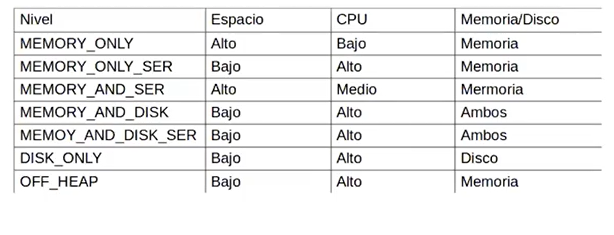


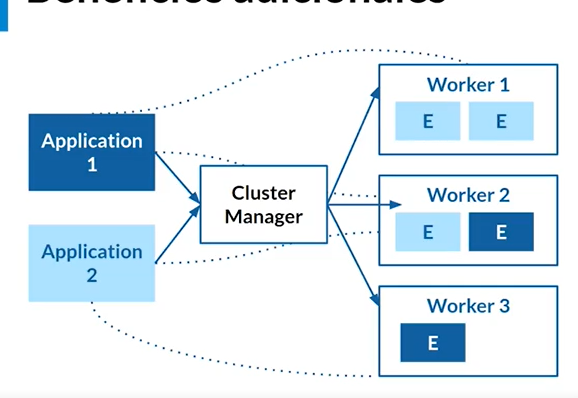



# Particionado
Los RDD son la capa de abstraccion primaria para poder interactuar con los datos que viven en nuestro ambiente de Spark. Aunque estos puedan ser enmascarados con un esquema dotándolos de las facultades propias de los DataFrames, la información de fonro sigue operando como RDD.

POr lo tanto, la ifnormación, como indica el nombre de los RDD, se maneja de forma distribuidas a lo largo del cluster, facilitando las operaciones que se van a ejecutar, ua que segmento de información pueden encontrarse en diferentes ejecutores reduciendo el tiempo necesario para acceder a la información y poder así reliazr los calculos necesarios.

Cuando un RDD o Datafrfam es creado, srgún las especificaciones que se indiquen a la aplicación de Spark, creará un esquema de particionado básico, el cual distribuirá los datos a lo largo del clúister. SIendo así que al momento de ejecutar una acción, esta se ejecutará entre los diversos fragmentos de información que existan para poder así realizar de la forma más rapida las oepraciones. Es por eso que un correcto esquema de particionado es clave para poder tener aplicaciones rápidas y precisas que además consuman pocos recursos de red.

Otra de las tareas funramentales es la replicación es componentes y sus fragmentos, ya que al aumentar la disponibilidad de estos podremos asegurar una tolerancia a fallos, miesntra más se replique un valor es más probelae que no se puerda si existe un fallo de red o energía, además de permitir una disponibilidad casi inmediata del archivo buscado.

Lla partición y replicación son elementos que deben ser analizados según el tipo de negocio o requerimientos que se etngan en el desarrollo que se encuentre en progreso, por lo cual la cantidad de datos replicados o granularidad de datos existentes en los framgenteos dependerá en funcion de las rteglas de negocio.